In [1]:
from preprocess.conversion import visualise_datapoint, visualise_scan_data, convert_all_npy

To visualise the samples, I have created several helper functions in preprocess/conversion.py. We can visualise a single datapoint by calling visualise_scan_data(). We can also visualise all four, by calling visualise_datapoint().

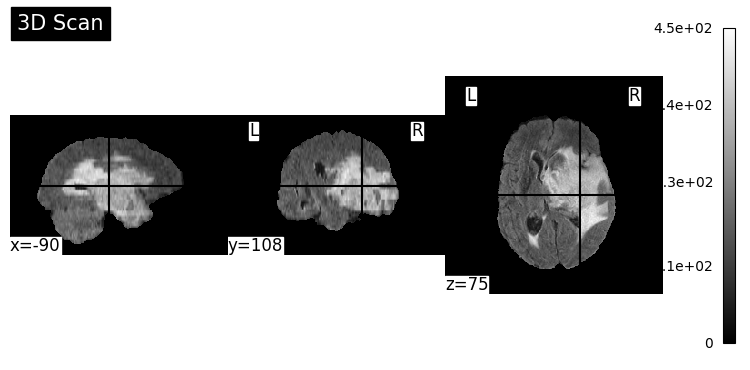

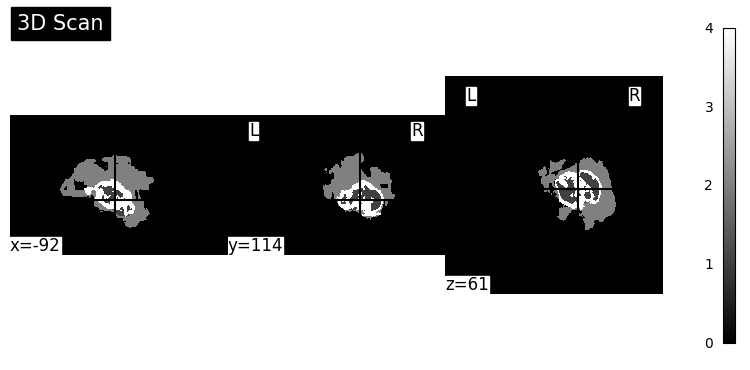

In [2]:
datapoints = []

datapoints.append("\BraTS20_Training_001\BraTS20_Training_001_flair.nii")
datapoints.append("\BraTS20_Training_001\BraTS20_Training_001_seg.nii")

for datapoint in datapoints:
    visualise_scan_data(datapoint, is_train=True)

To visualise all four parts, we can use:

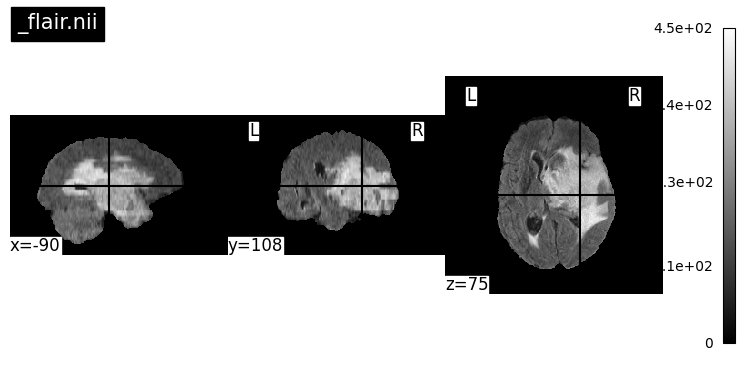

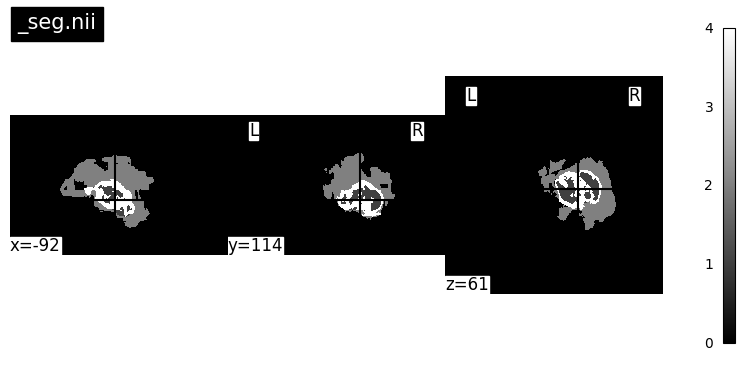

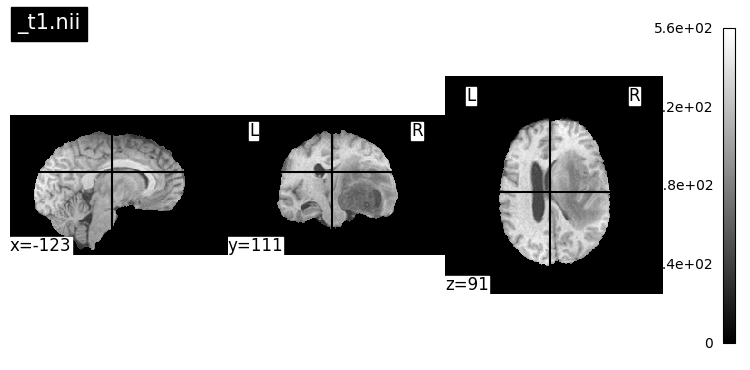

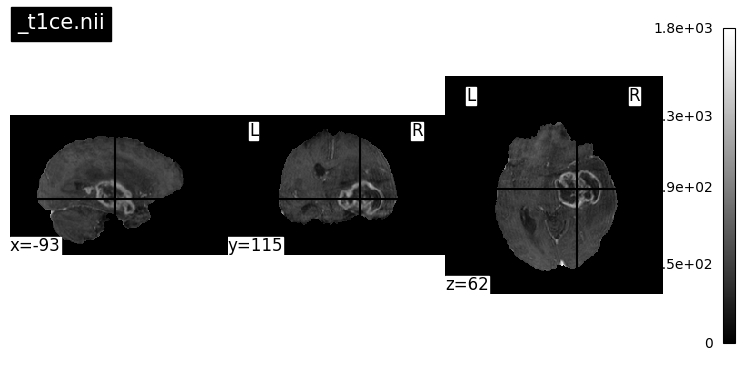

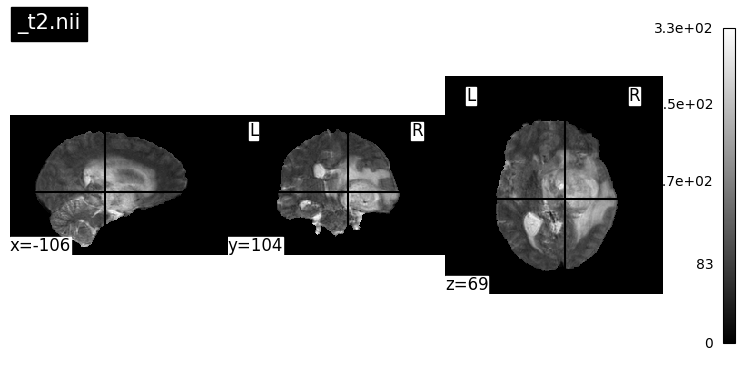

In [3]:

path = "\BraTS20_Training_001"
visualise_datapoint(path, is_train=True)

Before training the model, all .nii.gz files should be converted into NumPy arrays and saved locally to significantly reduce I/O overhead during training, since loading compressed medical imaging files repeatedly is slow. As part of this conversion process, each scan must be preprocessed to ensure consistency across the dataset: first, remove empty background regions  by cropping to the smallest bounding box containing meaningful information, which reduces memory usage and computational cost. then, we apply scaling using an appropriate scaler, in this case we used z-score normalisation to normalize  intensities and stabilize model training.

In [4]:
convert_all_npy()

369 datapoints found
Saving completed.


Now that we have completed the converting all the files into numpy format, we have to split the dataset into a training set and a testing set. If we look above, we can see that the t1 image does not look like it provides much useful information. Therefore, it will be skipped and not added into our training pipeline. Now we need to load our data into main memory.

In [1]:
from preprocess.splitting import train_test_split, combine_from_npy

features, labels = combine_from_npy()

In [2]:
features.shape

(369, 128, 128, 128, 3)

In [3]:
labels.shape

(369, 128, 128, 128, 4)

In [ ]:
features = features.reshape(369, 3, 128, 128, 128)
labels = labels.reshape(369, 4, 128, 128, 128)

In [4]:
train_dataloader, test_dataloader = train_test_split(features, labels)
del features
del labels

Training batches: 19
Testing batches: 5
